In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [ ]:
dataset = pd.read_csv('/titanic.csv')
dataset.head()

In [ ]:
features = ['Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp']
target = 'Survived'

In [ ]:
dataset['Sex'] = dataset['Sex'].replace(["female", "male"], [0, 1])
dataset['Embarked'] = dataset['Embarked'].replace(['S', 'C', 'Q'], [1, 2, 3])

### HeatMap

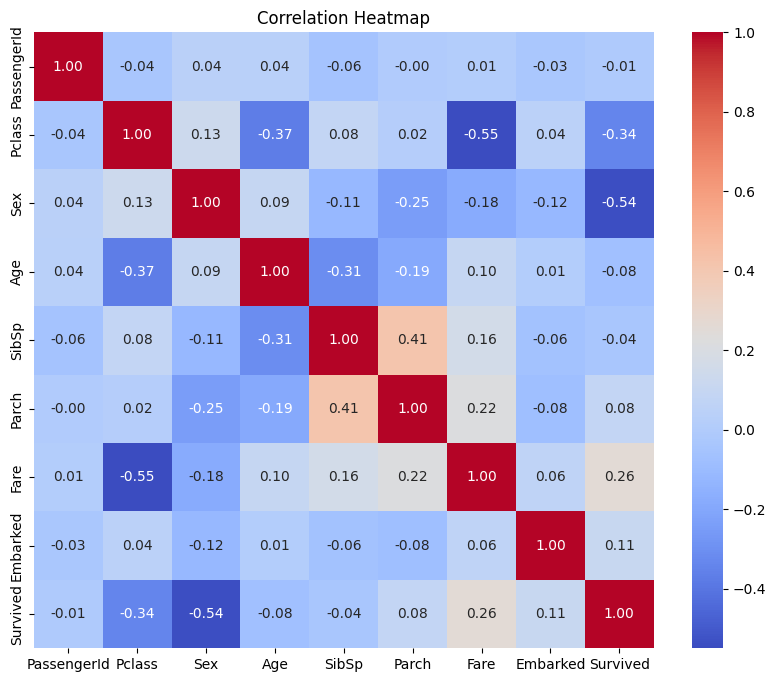

In [ ]:
numerical_columns = dataset.select_dtypes(include=[np.number])

correlation_matrix = numerical_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
columns_to_exclude = ['PassengerId', 'Name', 'Survived', 'Ticket','Cabin']

x = dataset.drop(columns=columns_to_exclude, axis=1)
y = dataset['Survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

### Comparison of Features v/s Target

<Figure size 500x300 with 0 Axes>

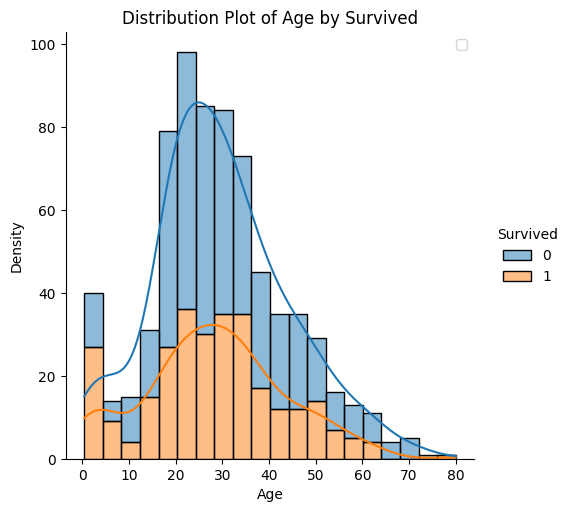

<Figure size 500x300 with 0 Axes>

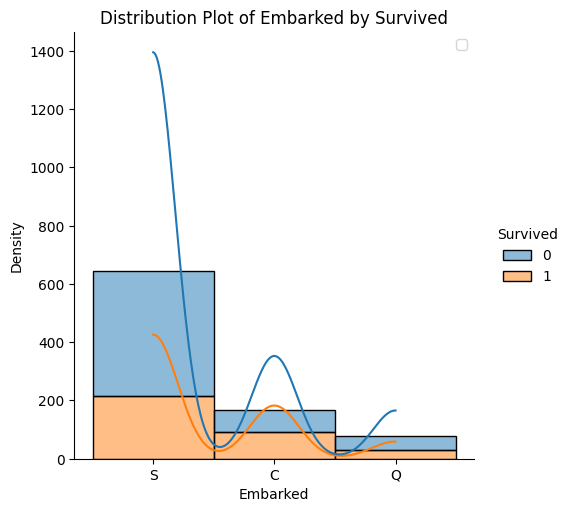

<Figure size 500x300 with 0 Axes>

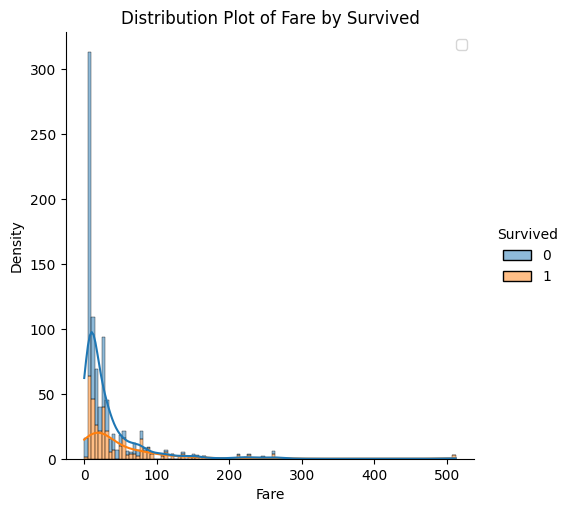

<Figure size 500x300 with 0 Axes>

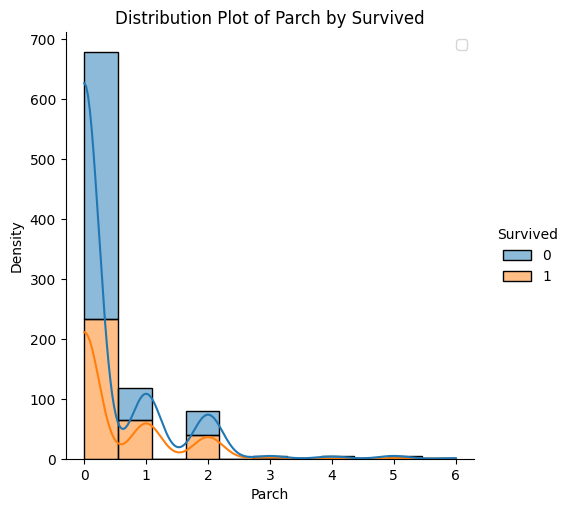

<Figure size 500x300 with 0 Axes>

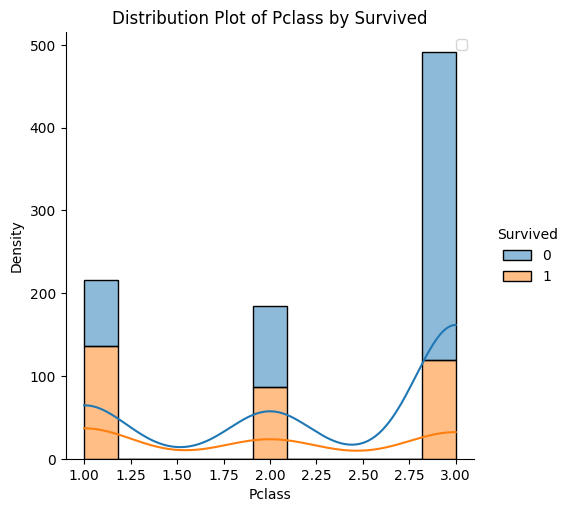

<Figure size 500x300 with 0 Axes>

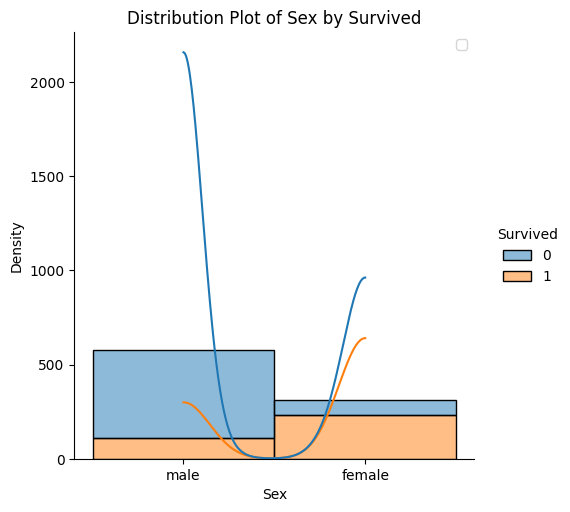

<Figure size 500x300 with 0 Axes>

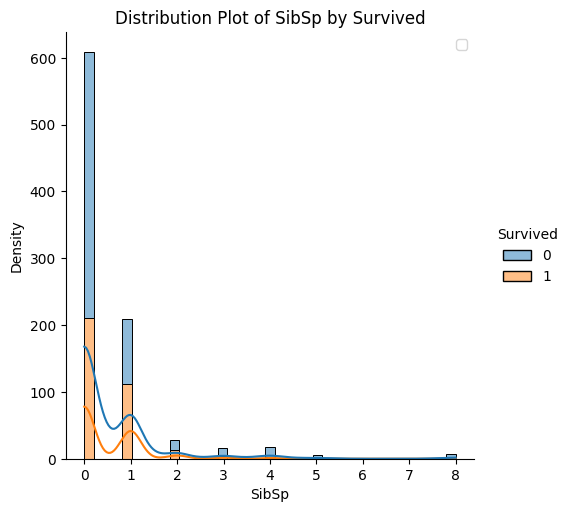

In [ ]:
for feature in features:
    plt.figure(figsize=(5, 3))
    if x_train[feature].dtype == 'O':
        sns.countplot(data=dataset, x=feature, hue=target)
        plt.title(f'Count Plot of {feature} by {target}')
    else:
        sns.displot(data=dataset, x=feature, hue=target, multiple='stack', kde=True)
        plt.title(f'Distribution Plot of {feature} by {target}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.show()


In [ ]:
dataset.dropna(subset=features + [target], inplace=True)

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and test data
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train_imputed)
x_test_scaled = sc.transform(x_test_imputed)

### Plotting Survival Count based on various Features

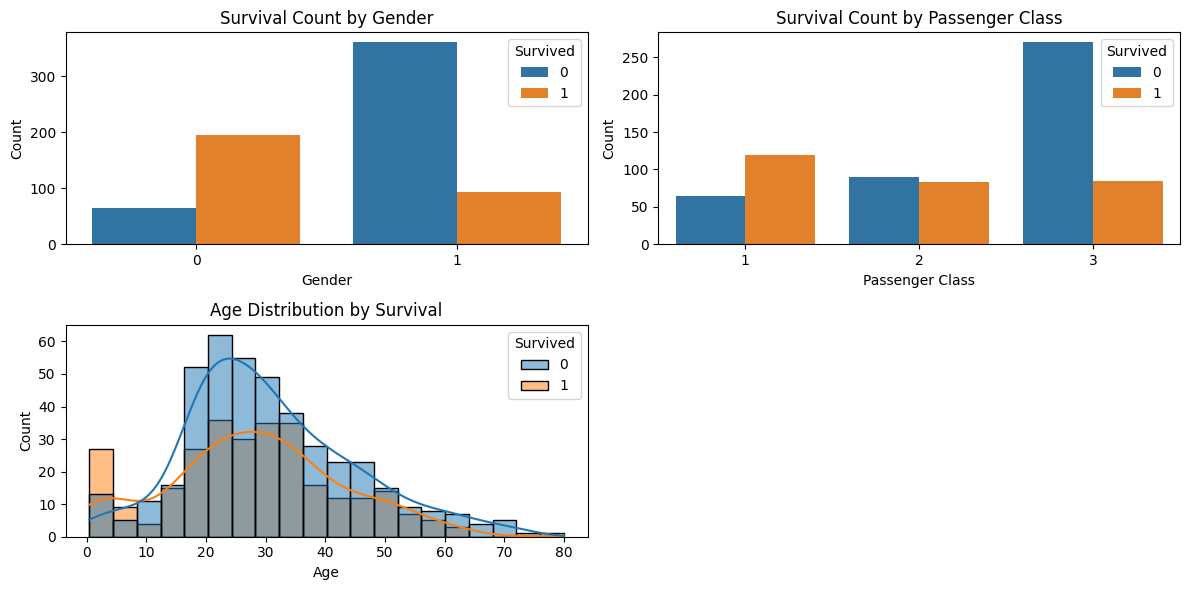

In [ ]:
plt.figure(figsize=(12,6))

plt.subplot(2, 2, 1)
sns.countplot(data=dataset, x='Sex', hue='Survived')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Survival Count by Gender')

plt.subplot(2, 2, 2)
sns.countplot(data=dataset, x='Pclass', hue='Survived')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.title('Survival Count by Passenger Class')

plt.subplot(2, 2, 3)
sns.histplot(data=dataset, x='Age', hue='Survived', kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution by Survival')
plt.tight_layout()
plt.show()

In [ ]:
classifier = GaussianNB()
classifier.fit(x_train_scaled, y_train)

GaussianNB()

In [ ]:
y_test_pred = classifier.predict(x_test_scaled)

In [ ]:
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_test_pred)
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       134
           1       0.73      0.74      0.73        89

    accuracy                           0.78       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.79      0.78      0.79       223

